In [1]:
import zipfile

# Path to the zip file
zip_file_path = '/content/fyp robot.v3i.yolov8.zip'

# Path to the directory where you want to extract the contents
extract_to = '/content/data/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to {extract_to}")


Unzipped to /content/data/


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 48.5 MB/s eta 0:00:00


In [3]:

from ultralytics  import YOLO

In [4]:
!yolo task= detect mode = train model=yolov8n.pt data=/content/data/data.yaml epochs=50  imgsz=640 batch=25


100% 6.25M/6.25M [00:00<00:00, 327MB/s]
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=50, time=None, patience=100, batch=25, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

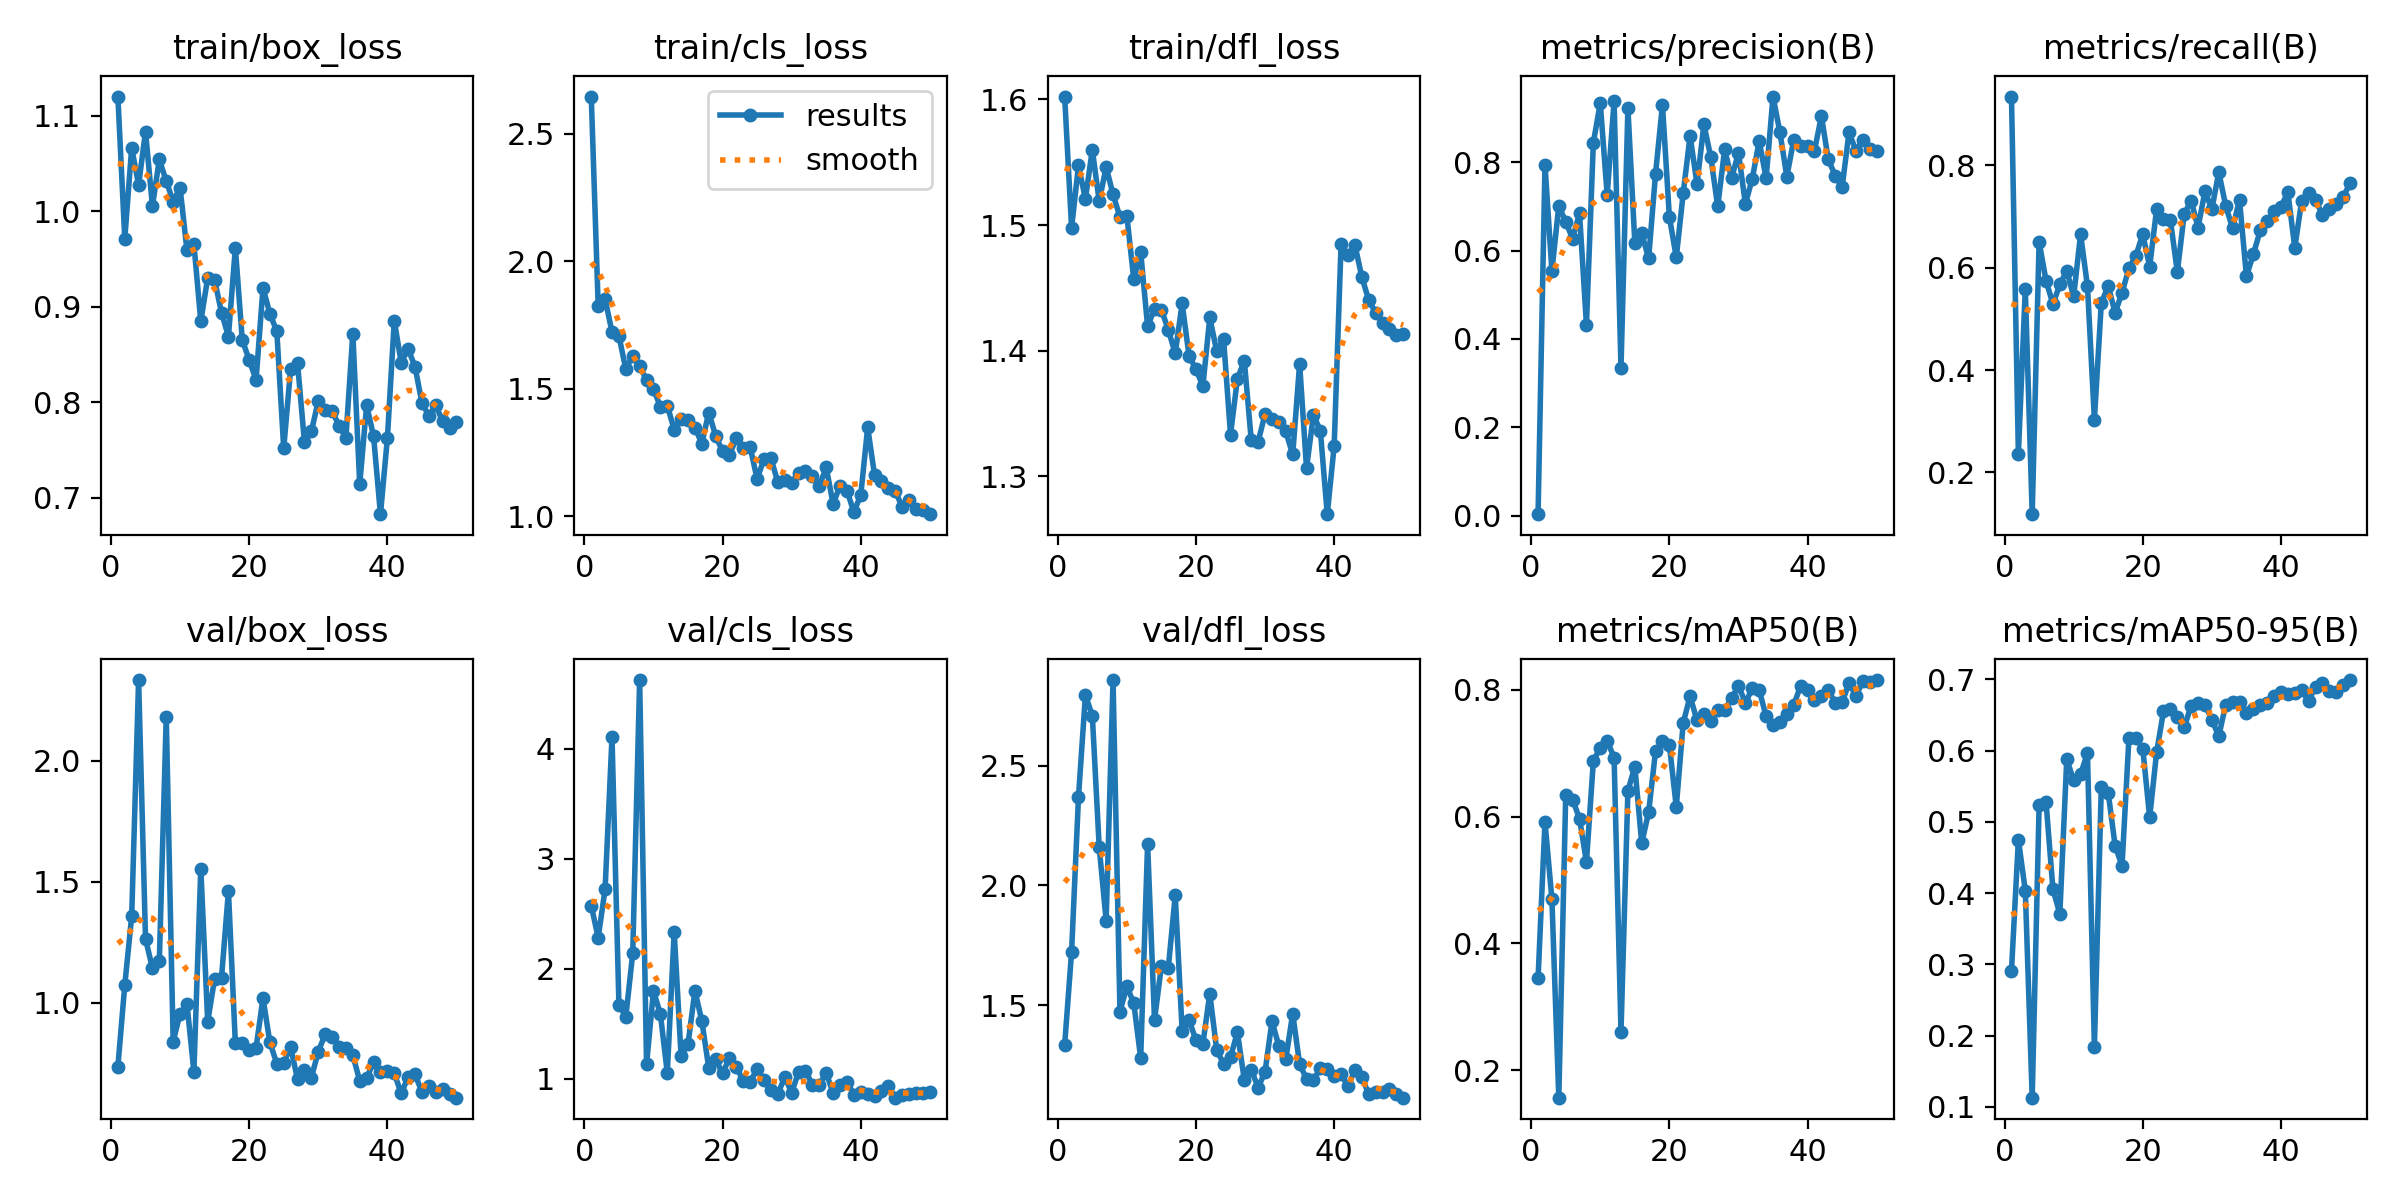

In [5]:

from IPython.display import Image
Image(filename=f'/content/runs/detect/train/results.png' )

In [6]:

model = YOLO('/content/runs/detect/train/weights/best.pt')

In [7]:

results = model.val(data='/content/data/data.yaml')

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/data/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 56. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all         53         56      0.836      0.761      0.809      0.699
            Rough Wall         38         38      0.833      0.657      0.729      0.575
           Smooth Wall         18         18      0.838      0.865       0.89      0.824
Speed: 5.3ms preprocess, 9.2ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to runs/detect/val
